# Image Compression with K-Means Clustering Algorithm 
By Aniket Thani

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Find Closest Centroid For Each Training Example 

In [2]:
def FindClosestCentroid(X,centroids):
    res=[]
    for i in range(len(X)):
        idx=0
        mini=np.sum(((X[i,:]-centroids[0,:])**2))
        for k in range(len(centroids)):
            dist=np.sum(((X[i,:]-centroids[k,:])**2))
            if mini>dist:
                mini=dist
                idx=k
        res.append(idx)
    
    return np.array(res)

        

# Compute New Locations of Centroids

In [3]:
def ComputeCentroids(X,idx):
    res=[]
    for i in set(idx):
        res.append(np.mean(X[idx==i],axis=0))
    return np.array(res)
    

# Function To Run K-Means Algorithm

In [4]:
def runKMeans(X,initial_centroids,max_iters,plot_steps=True):
    centroids=initial_centroids
    for i in range(max_iters):
        
        idx=FindClosestCentroid(X,centroids)
        centroids=ComputeCentroids(X,idx)
        
        #plotting Clusters
        if plot_steps:
            for i in set(idx):
                plt.plot(X[idx==i,0],X[idx==i,1],'x')
            
            plt.show()
        
        
    return idx,centroids

# Random initialization Of Centroids

In [5]:
def random_init_centroids(X,k):
    indices=np.linspace(0,len(X),len(X),dtype=int)
    ri=np.random.choice(indices,k)
    return X[ri,:]

In a straightforward 24-bit color representation of an image,each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values.  This encoding is often refered to as the RGB encoding.  Our image contains thousands of colors, and in this partof the exercise, you will reduce the number of colors to 26 colors.By making this reduction, it is possible to represent (compress) the photo in an efficient way.  Specifically,  you only need to store the RGB values of the 26 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 5 bits are necessary to represent 26 possibilities).In this exercise, you will use the K-means algorithm to select the 26 colors that will be used to represent the compressed image.  Concretely,  you will treat every pixel in the original image as a data example and use the K-meansalgorithm to find the 26 colors that best group (cluster) the pixels in the 3-dimensional RGB space.  Once you have computed the cluster centroids onthe image, you will then use the 26 colors to replace the pixels in the originalimage.

# Reading Image

In [6]:
orig_image_pix=plt.imread('images/parrot.png')

In [7]:
image_pixels=plt.imread('images/parrot.png')

In [8]:
image_pixels.shape

(512, 512, 4)

Removing The values of transparency as they are all zero

In [9]:
image_pixels=image_pixels[:,:,0:3]

In [10]:
image_pixels.shape

(512, 512, 3)

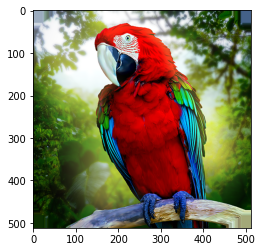

In [11]:
plt.imshow(image_pixels);

Reshaping image data into shape of (m,3) where m=no.of pixels

In [12]:
image_pixels=image_pixels.reshape((image_pixels.shape[0]*image_pixels.shape[1],image_pixels.shape[2]))

In [13]:
image_pixels.shape

(262144, 3)

Running The K means Algorithm to find 26 most common colors

In [14]:
initial_centroids=random_init_centroids(image_pixels,26)

In [15]:
initial_centroids.shape

(26, 3)

In [16]:
idx,centroids=runKMeans(image_pixels,initial_centroids,max_iters=10,plot_steps=False)

In [17]:
idx.shape

(262144,)

In [18]:
centroids.shape

(26, 3)

# Compressed Image Formation

In [19]:
im=[]
for i in idx:
    im.append(centroids[i,:])
im=np.array(im)

In [20]:
im.shape

(262144, 3)

In [21]:
im=im.reshape((orig_image_pix.shape[0],orig_image_pix.shape[1],3))

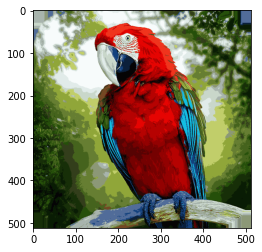

In [23]:
compressed_image=plt.imshow(im)
plt.imsave('new.png',im)

The original imagerequired 24 bits for each one of the 512×512 pixel locations, resulting in totalsize of 512×512×24 = 6,328,320 bits.  The new representation requires some overhead storage in form of a dictionary of 26 colors, each of which require 24 bits, but the image itself then only requires 5 bits per pixel location.  The final number of bits used is therefore 26×24 + 512×512×5 = 1,311,344 bits,which corresponds to compressing the original image by about a factor of 5.

# Thank You